# Franck-Condon vs. MLJ Fits

### Important Paper (https://doi.org/10.1039/C8MH00564H)

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import scipy.integrate as integrate
from mpmath import nsum, exp, inf
from math import e

#### Parameters & Variables

In [348]:
k = 1.38064852*10**(-23) #[m2*kg/(s2*K)]
k_eV = 8.617333262145*10**(-5) #[eV/K]
hbar = 1.0545718*10**(-34) #[m2*kg / s]
hbar_eV = 6.5821*10**(-16) #[eV/s] 

### Franck-Condon Fit

##### Doesn't work...

In [285]:
def FC_fit(Energy, S_i, sig, E0, hbar_w):
    rPL_list = []
    for E in Energy:    
        #E = round(E, 2)
        rPL = nsum(lambda v: ((math.exp(-S_i)*S_i**v) / (math.factorial(v)))
                          * math.exp(-E**2 / (2*sig**2)) \
                          * Delta(E, (E0+v*hbar_w)), [0, 5])
        rPL_list.append(rPL)
    return rPL_list

In [158]:
def Delta(x, a):
    delta_a = (1/(abs(a)*math.sqrt(math.pi)))*math.exp(-(x/a)**2)
    return delta_a

##### Modified version, according to Anna Koehler's book / paper

In [344]:
def FC_fit(Energy, No, S_0, S_1, sig, E0, hbar_w0, hbar_w_1):
    rPL_list = []
    for E in Energy:  
        if No == 0:
            rPL = nsum(lambda v: (math.exp(-S_0) * S_0**v / math.factorial(v)) \
                   * math.exp(-(E-(E0-v*hbar_w_0))**2 / (2*sig**2)), [0, 5])
        elif No == 1:
            rPL = nsum(lambda m1: (nsum(lambda m0: (math.exp(-S_0) * S_0**m0 / math.factorial(m0)) \
                                        * (math.exp(-S_1) * S_1**m1 / math.factorial(m1)) \
                                        * math.exp(-(E-(E0-m0*hbar_w_0-m1*hbar_w_1))**2 / (2*sig**2)), [0, 5])), [0, 5])
        rPL_list.append(rPL)
    return rPL_list

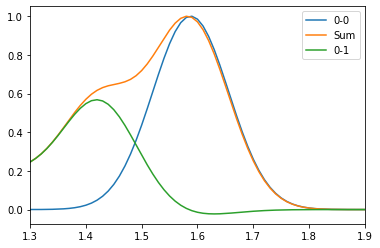

In [345]:
Energy = np.arange(0.3, 3, 0.01)
rPL_0 = FC_fit(Energy, 0, 4, 0.58, 0.067, 1.62, 0.01, 0.165)
rPL_sum = FC_fit(Energy, 1, 4, 0.58, 0.067, 1.62, 0.01, 0.165)

rPL_0 = [x / float(max(rPL_0)) for x in rPL_0]
rPL_sum = [x / float(max(rPL_sum)) for x in rPL_sum]

rPL_1 = [rPL_sum[x] - rPL_0[x] for x in range(len(rPL_0))]

plt.plot(Energy, rPL_0, label='0-0')
plt.plot(Energy, rPL_sum, label='Sum')
plt.plot(Energy, rPL_1, label='0-1')
plt.xlim(1.3, 1.9)
plt.legend()

### Marcus-Levich-Jortner Fit

#### Without disorder

In [354]:
def MLJ_fit(Energy, E_CT, l_o, S_i, hbar_w_i, T):
    PL_MLJ_list = []
    for E in Energy:
        PL = nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-((E_CT-E-l_o-v*hbar_w_i)**2) / (4*l_o*k_eV*T)), [0, 5])
        PL_MLJ_list.append(PL)
        
    return PL_MLJ_list   

#### Including disorder

In [359]:
def MLJ_fit_disorder(Energy, E_CT, l_o, S_i, hbar_w_i, sig, T):
    PL_MLJ_list = []
    for E in Energy:
        PL = nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-((E_CT-E-l_o-v*hbar_w_i)**2) / (4*l_o*k_eV*T + 2*sig**2)), [0, 5])
        PL_MLJ_list.append(PL)
        
    return PL_MLJ_list   

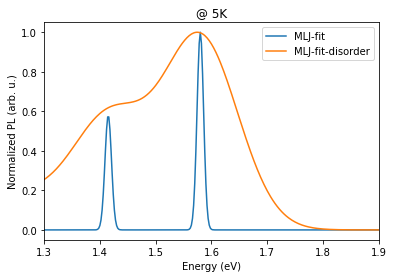

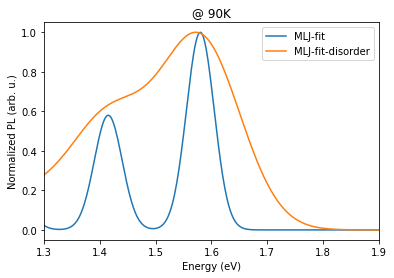

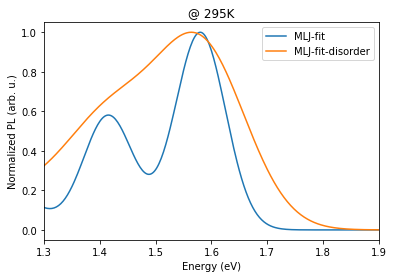

In [368]:
Energy = np.arange(1.2, 2, 0.002)

# T = 5K
PL = MLJ_fit(Energy, 1.62, 0.04, 0.58, 0.165, 5)
PL_disorder = MLJ_fit_disorder(Energy, 1.62, 0.04, 0.58, 0.165, 0.067,5)
PL = [x / float(max(PL)) for x in PL]
PL_disorder = [x / float(max(PL_disorder)) for x in PL_disorder]
plt.plot(Energy, PL, label='MLJ-fit')
plt.plot(Energy, PL_disorder, label='MLJ-fit-disorder')
plt.xlim(1.3, 1.9)
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized PL (arb. u.)')
plt.title('@ 5K')
plt.legend()
plt.show()

# T = 90K
PL = MLJ_fit(Energy, 1.62, 0.04, 0.58, 0.165, 90)
PL_disorder = MLJ_fit_disorder(Energy, 1.62, 0.04, 0.58, 0.165, 0.067, 90)
PL = [x / float(max(PL)) for x in PL]
PL_disorder = [x / float(max(PL_disorder)) for x in PL_disorder]
plt.plot(Energy, PL, label='MLJ-fit')
plt.plot(Energy, PL_disorder, label='MLJ-fit-disorder')
plt.xlim(1.3, 1.9)
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized PL (arb. u.)')
plt.title('@ 90K')
plt.legend()
plt.show()

# T = 295K
PL = MLJ_fit(Energy, 1.62, 0.04, 0.58, 0.165, 295)
PL_disorder = MLJ_fit_disorder(Energy, 1.62, 0.04, 0.58, 0.165, 0.067, 295)
PL = [x / float(max(PL)) for x in PL]
PL_disorder = [x / float(max(PL_disorder)) for x in PL_disorder]
plt.plot(Energy, PL, label='MLJ-fit')
plt.plot(Energy, PL_disorder, label='MLJ-fit-disorder')
plt.xlim(1.3, 1.9)
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized PL (arb. u.)')
plt.title('@ 295K')
plt.legend()
plt.show()